# 3 A stochastic model of damages



Our construction of potential damage functions is similar to \citeauthor{BarnettBrockHansen:2020} with specifications motivated in part by prior contributions.
We posit a damage process, $N_t$, to capture negative externalities on society imposed by carbon emissions.  The reciprocal of damages, ${\frac{1}{N_t}}$,  diminishes the  productive capacity of the economy because of the impact of climate change.



We use a piecewise log quadratic function for mapping how temperature change induced by emissions alter economic opportunities:

$$
\log N_t = \Gamma(Y_t) + \iota_n \cdot Z_t
$$

for temperature anomaly $Y_t$ where

$$
\Gamma(y) = \gamma_1y + {\frac {\gamma_2} 2} y^2  + {\frac {\gamma_3} 2} {\bf 1}_{y \ge {\overline y}}
( y- {\overline y} )^2 .
$$

In this specification, there is a temperature anomaly threshold ${\overline y}$ after which the damage function could becomes much more curved.  This curvature in the "tail" of the damage function is only revealed to decision makers near the threshold.  We let the threshold,
${\overline y}$, equal a temperature anomaly of two degrees centigrade.

To capture damage function uncertainty, we posit a jump process with $m$ absorbing states.  Each state corresponds to
a value of $\gamma_3$ starting at threshold ${\overline y}$. We denote the possible values as $\gamma_3^m$ for $m=1,2,..., M.$
We focus on cases where the  jump occurs when $ Y < {\tilde y} \le {\overline y}$.  At the time of the jump,
the right tail of the damage function is revealed  via $\gamma_3$ whereas prior to the jump this parameter is unknown where each value $\gamma_3^m$ has prior probability $\pi_m^p.$  We localize the jump around the threshold ${\bar y}$, and for some the computations take limits of this where the jump is very likely to occur just prior to hitting the threshold.  What is uncertain is the value of $\gamma_3$ governing the steepness of the damage until after the jump takes place.


In our illustration, we consider 3 damage specifications, $i.e.\ M = 3$.
The parameter values are as follows:

| Parameter | Value |
|----|-------|
| $\bar y$| 2|
|$\gamma_3^1$| 0|
|$\gamma_3^2$|0.0394|
|$\gamma_3^3$|0.7706|

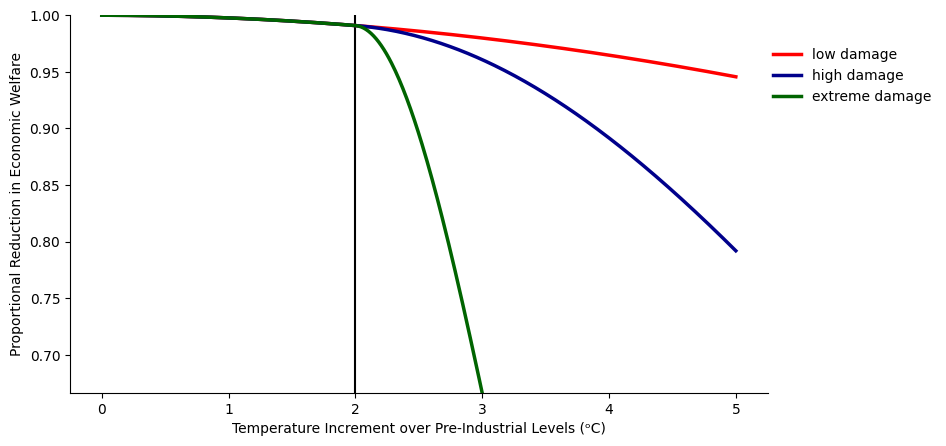

In [5]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['legend.frameon'] = False
# Add damage function plots here (three damages)
γ1 = 1.7675/10000
γ2 = .0022*2
γ3_list = np.array([0, .0197*2, .3853*2])
y = np.linspace(0,5,500)
ȳ = 2
plt.figure(figsize=(9,5), dpi=100)
for γ3,  name, color in zip(γ3_list, ["low", "high", "extreme"], ["red", "darkblue", "darkgreen"]):
    plt.plot(y, np.exp( - γ1*y - γ2/2*y**2 - γ3/2*(y - ȳ)**2*(y>ȳ)), 
             color=color, linewidth=2.5, label=name+" damage")
plt.vlines(2, ymin=2/3, ymax=1, color="black")
plt.ylim(2/3,1)
plt.legend(loc=(1,0.75))
plt.xlabel("Temperature Increment over Pre-Industrial Levels (ᵒC)")
plt.ylabel("Proportional Reduction in Economic Welfare")
plt.show()

We impose a jump intensity function that is, by design, localized at $ y = {\overline y}$:


$$
{\mathcal I} (y) = \left\{ \begin{matrix} \left(\frac 1  {\sqrt{2}\rho} \right) \exp\left[ - \frac {\left(y - \overline y \right)^2 } {2 \rho^2  } \right] & y < {\overline y} \cr \left(\frac 1 {\sqrt{2}\rho} \right) & y \ge  {\bar y} \end{matrix}  \right.
$$

which becomes concentrated in the neighborhood of ${\bar y}$ for $\rho$ small.

\footnote{This intensity is recognizable as the scaled version of  half normal density with mean ${\overline y}$ and standard deviation $\rho$.} A large intensity informs us that a jump is likely.  We let ${\pi}_m^p$  be the probabilities conditioned on the jump.  When the process jumps to state $m$, the parameter $\gamma_3^m$ is revealed and the continuation value function is $\phi_m$.  For sufficiently small  $\rho$, we will approximate the solution to the control problem by deriving an ambiguity adjusted continuation value function at ${\overline y}$.

The follow figure is an intensity function with $\rho=0.01$.

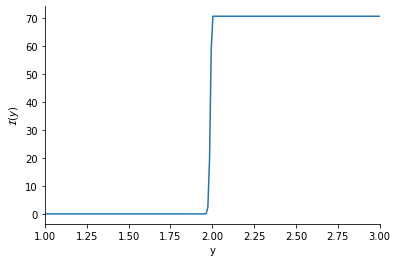

In [17]:
# One intensity function
ρ = 0.01
I = 1/(np.sqrt(2)*ρ)*np.exp(- (y - ȳ)**2/(2*ρ**2))*(y<ȳ) + 1/(np.sqrt(2)*ρ)*(y>=ȳ)
plt.plot(y, I)
plt.xlim(1,3)
plt.xlabel('y')
plt.ylabel('$\mathcal{I}(y)$')
plt.show()